In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, brier_score_loss, precision_recall_curve, auc,roc_curve
from sklearn.calibration import calibration_curve
from matplotlib.gridspec import GridSpec

In [5]:
train=pd.read_csv(r"C:\Users\deepa\DECODEML\vipinsirproject1\train.csv")
test=pd.read_csv(r"C:\Users\deepa\DECODEML\vipinsirproject1\test.csv")

In [6]:
train

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,66633,0.086,16805,114110,0.0,0.0,0.0,99.87,8,A,Urban,3300,1
1,62807,0.010,22638,315120,0.0,0.0,0.0,99.25,19,A,Rural,3300,1
2,30822,0.312,11685,125100,0.0,0.0,0.0,98.84,13,A,Urban,7500,1
3,101201,0.276,24829,150200,2.0,0.0,0.0,99.02,17,A,Urban,7500,1
4,63479,0.308,20445,137880,0.0,0.0,0.0,98.80,11,A,Rural,7500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67870,95125,0.000,14610,105110,0.0,0.0,0.0,99.34,9,A,Urban,5400,1
67871,107201,0.290,16795,30080,0.0,0.0,0.0,96.77,5,A,Urban,1200,1
67872,81642,0.020,11328,93040,0.0,0.0,0.0,99.66,8,B,Urban,11700,1
67873,113183,0.264,25559,166230,0.0,0.0,0.0,99.26,7,B,Urban,9600,1


In [7]:
train.isnull().sum()


id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 88
Count_6-12_months_late                88
Count_more_than_12_months_late        88
application_underwriting_score      2539
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [8]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,66633,0.086,16805,114110,0.0,0.0,0.0,99.87,8,A,Urban,3300,1
1,62807,0.010,22638,315120,0.0,0.0,0.0,99.25,19,A,Rural,3300,1
2,30822,0.312,11685,125100,0.0,0.0,0.0,98.84,13,A,Urban,7500,1
3,101201,0.276,24829,150200,2.0,0.0,0.0,99.02,17,A,Urban,7500,1
4,63479,0.308,20445,137880,0.0,0.0,0.0,98.80,11,A,Rural,7500,1


In [9]:
train['total_late'] = (train['Count_3-6_months_late'] +
                       train['Count_6-12_months_late'] +
                       train['Count_more_than_12_months_late'])

In [10]:
num_col = [
    'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
    'total_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium'
]
cat_col = ['sourcing_channel', 'residence_area_type']

In [11]:
train[num_col] = train[num_col].fillna(train[num_col].median())


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67875 entries, 0 to 67874
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                67875 non-null  int64  
 1   perc_premium_paid_by_cash_credit  67875 non-null  float64
 2   age_in_days                       67875 non-null  int64  
 3   Income                            67875 non-null  int64  
 4   Count_3-6_months_late             67787 non-null  float64
 5   Count_6-12_months_late            67787 non-null  float64
 6   Count_more_than_12_months_late    67787 non-null  float64
 7   application_underwriting_score    67875 non-null  float64
 8   no_of_premiums_paid               67875 non-null  int64  
 9   sourcing_channel                  67875 non-null  object 
 10  residence_area_type               67875 non-null  object 
 11  premium                           67875 non-null  int64  
 12  rene

In [25]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'renewal', 'total_late'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('onehot_source', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['sourcing_channel']),
        ('onehot_area', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['residence_area_type'])
    ],
    remainder='drop'
)

In [31]:
x_train=preprocessor.fit_transform(train)

In [33]:
#label inversion -non renewal as 1

y_train=train['renewal'].map({0:1,1:0})

In [35]:
from xgboost import XGBClassifier

In [37]:
# ========== 6. Handle Class Imbalance ==========
zero_count = (y_train == 0).sum()
one_count = (y_train == 1).sum()
scale_pos_weight = zero_count/one_count

In [39]:
# ========== 7. Define Model and Hyperparameter Search Space ==========
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

In [41]:
param_dist ={'n_estimators':[300, 500, 800,1100],'learning_rate':[0.01, 0.03, 0.04, 0.05, 0.1],
    'max_depth':[3, 4, 5],'subsample':[0.6, 0.7, 0.8, 0.9],'colsample_bytree':[0.6, 0.7, 0.8, 0.9],'reg_alpha':[1, 3, 5],
    'reg_lambda':[10,15,20]}

In [43]:
from sklearn.model_selection import StratifiedKFold,  RandomizedSearchCV

In [45]:
cv_outer = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='average_precision',  # PR-AUC
    cv=cv_outer,
    verbose=2,
    random_state=42,n_jobs=-1)

In [47]:
random_search.fit(x_train, y_train)
print("\nBest Hyperparameters:")
print(random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Hyperparameters:
{'subsample': 0.9, 'reg_lambda': 15, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.04, 'colsample_bytree': 0.8}


In [49]:
from sklearn.calibration import CalibratedClassifierCV

In [51]:
# ========== 8. Calibrate Best Model (Isotonic) ==========
best_xgb = random_search.best_estimator_
cal_iso = CalibratedClassifierCV(estimator=best_xgb, method='isotonic', cv=3)
cal_iso.fit(x_train,y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,method,'isotonic'
,cv,3
,n_jobs,None
,ensemble,'auto'
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None


In [52]:
from sklearn.model_selection import cross_val_predict

In [55]:
y_prob_cv=cross_val_predict(cal_iso,x_train,y_train,cv=cv_outer,method="predict_proba")
pred_iso =y_prob_cv[:,1]

In [57]:
from sklearn.metrics import roc_auc_score


In [59]:
# ========== 10. Evaluation Metrics ==========
train_pred_iso = cal_iso.predict_proba(x_train)[:, 1]
train_auc = roc_auc_score(y_train, train_pred_iso)
cv_auc = roc_auc_score(y_train, pred_iso)
auc_gap = train_auc - cv_auc
brier = brier_score_loss(y_train, pred_iso)
precision, recall, _ = precision_recall_curve(y_train, pred_iso)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_train, pred_iso)
prob_true, prob_pred = calibration_curve(y_train, pred_iso,n_bins=10)

In [61]:
# ========== 11. Print Results ==========
print("\nCalibration Results")
print(f"Train AUC  : {train_auc:.4f}")
print(f"CV AUC     : {cv_auc:.4f}")
print(f"AUC Gap    : {auc_gap:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"PR-AUC     : {pr_auc:.4f}")


Calibration Results
Train AUC  : 0.8543
CV AUC     : 0.8386
AUC Gap    : 0.0157
Brier Score: 0.0490
PR-AUC     : 0.3307


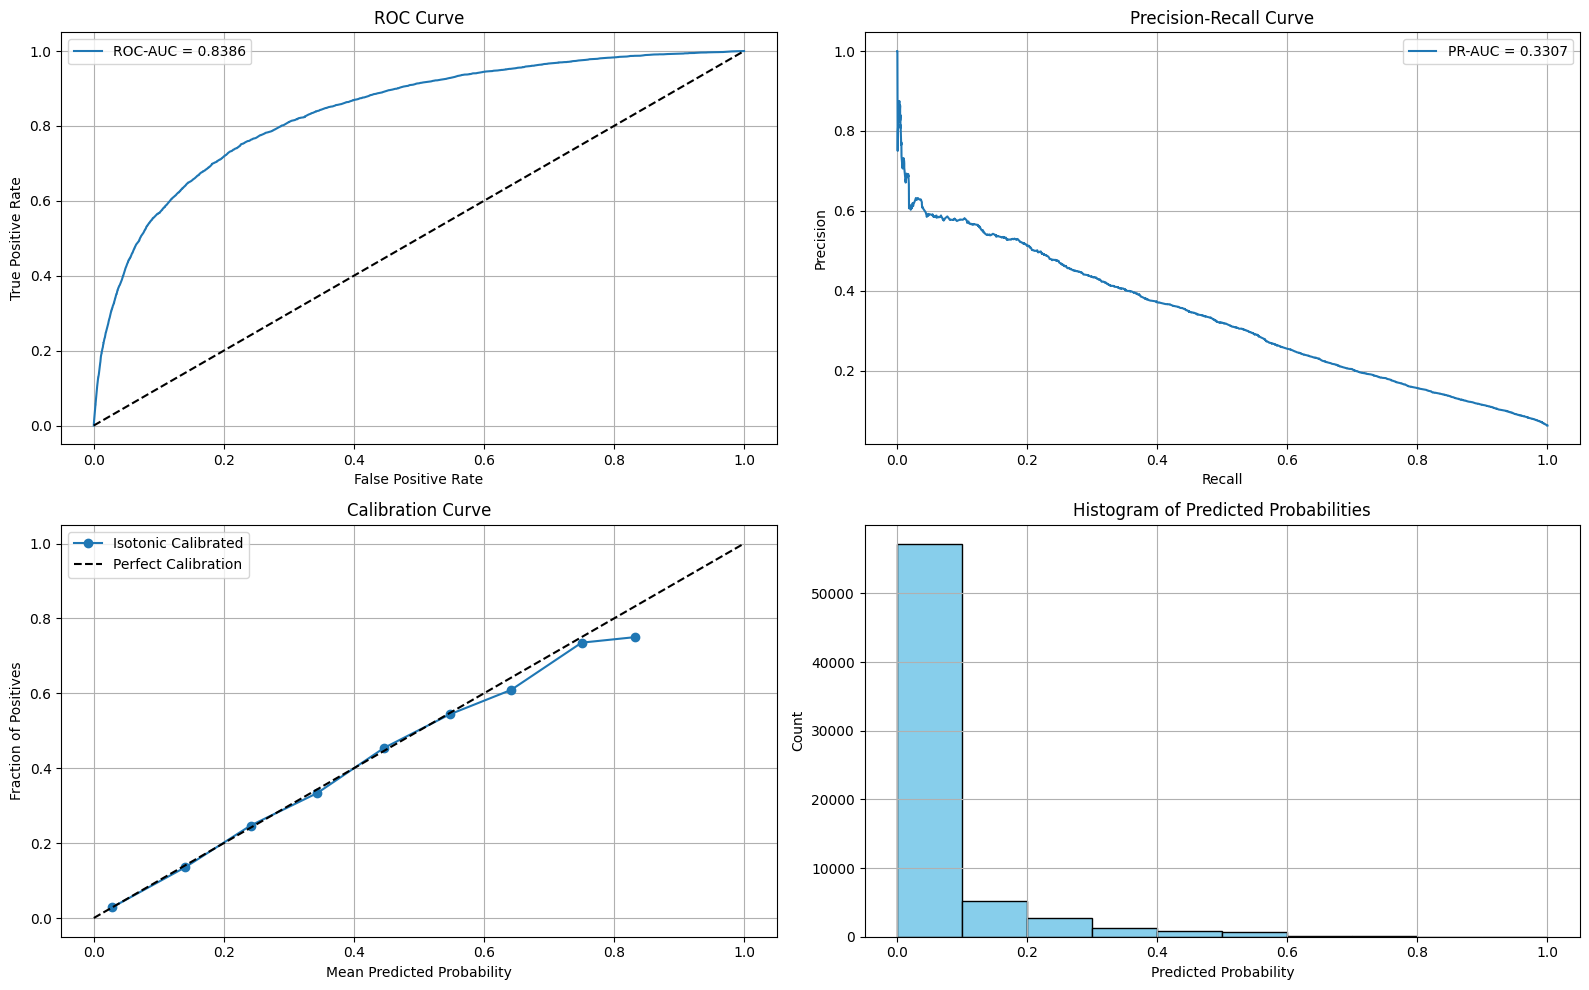

In [64]:
# ========== 12. Plotting ==========
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2)
# ROC Curve
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(fpr, tpr, label=f"ROC-AUC = {cv_auc:.4f}")
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_title("ROC Curve")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend()
ax1.grid(True)

# PR Curve
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(recall, precision, label=f"PR-AUC = {pr_auc:.4f}")
ax2.set_title("Precision-Recall Curve")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend()
ax2.grid(True)

# Calibration Curve
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(prob_pred, prob_true, marker='o', label='Isotonic Calibrated')
ax3.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
ax3.set_title("Calibration Curve")
ax3.set_xlabel("Mean Predicted Probability")
ax3.set_ylabel("Fraction of Positives")
ax3.legend()
ax3.grid(True)

# Histogram of Predicted Probabilities
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(pred_iso, bins=10, range=(0, 1), edgecolor='black', color='skyblue')
ax4.set_title("Histogram of Predicted Probabilities")
ax4.set_xlabel("Predicted Probability")
ax4.set_ylabel("Count")
ax4.grid(True)
plt.tight_layout()
plt.show()

In [68]:
import joblib
joblib.dump(cal_iso,r"C:\Users\deepa\DECODEML\vipinsirproject1\final_calibrated_model.pkl.txt")


['C:\\Users\\deepa\\DECODEML\\vipinsirproject1\\final_calibrated_model.pkl.txt']

In [70]:
print(random_search.best_params_)

{'subsample': 0.9, 'reg_lambda': 15, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.04, 'colsample_bytree': 0.8}


In [72]:
# Access the list of calibrated classifiers
calibrated_models = cal_iso.calibrated_classifiers_

# Example: get parameters of the base estimator in the first fold
base_model = calibrated_models[0].estimator
print(base_model.get_params())


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'aucpr', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.04, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 15, 'sampling_method': None, 'scale_pos_weight': 14.978107344632768, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [74]:
!pip install fastapi uvicorn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
